# I. Install and load libraries

In [19]:
import wandb
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
load_dotenv()

True

# II. Importing dataset 

In [20]:
run = wandb.init(project="diabetes", job_type="EDA")

In [21]:
WANDB_API_KEY=os.environ.get('WANDB_API_KEY')
!wandb login --relogin $WANDB_API_KEY

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\PC\_netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [22]:
artifact = wandb.use_artifact('diabetes/fetch_data.csv:latest', type='fetching')

dataset_dir = artifact.download()

wandb.finish()

wandb:   1 of 1 files downloaded.  


In [ ]:
path = os.path.join(dataset_dir, "diabete.csv")

df = pd.read_csv(path)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# III. EDA

In [24]:
df.shape

(253680, 22)

In [25]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [27]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [28]:
df.duplicated().sum()

24206

In [29]:
df.drop_duplicates(inplace = True)

## 1. Correlation 

<Axes: >

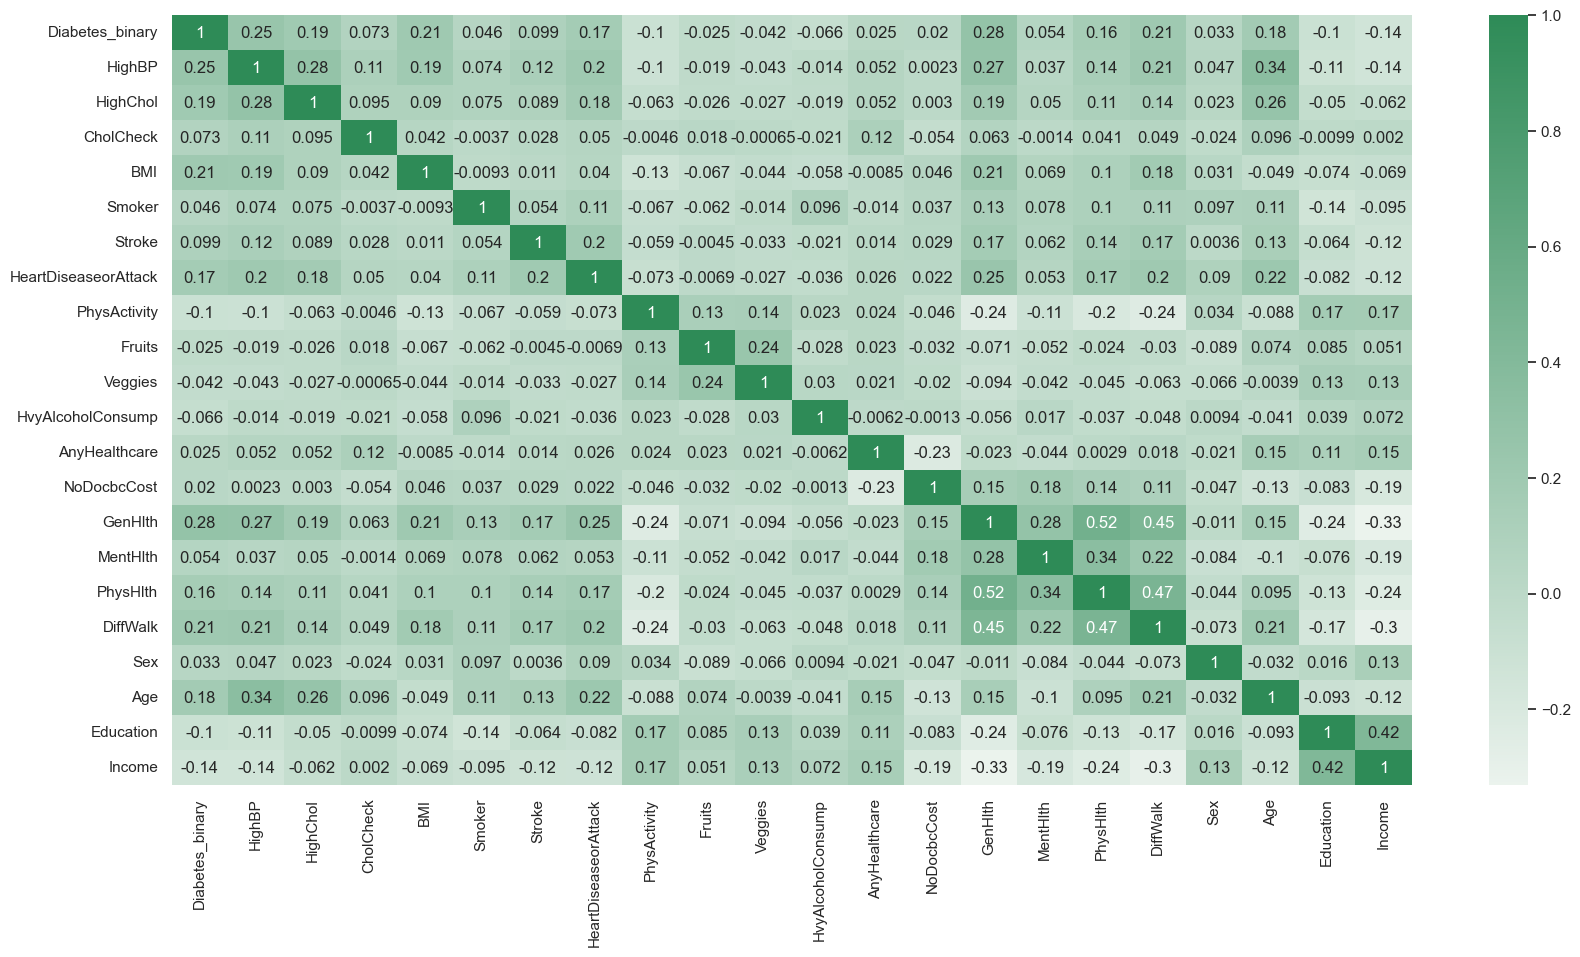

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap =(sns.light_palette("seagreen", as_cmap=True)) )

In [31]:
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['Diabetes_binary'].drop(labels=['Diabetes_binary'])
sorted_corr = target_corr.sort_values()
print(f"\n🔻 Top {5} Negative Correlations with diabetes:")
print(sorted_corr.head(5))
print(f"\n🔺 Top {5} Positive Correlations with diabetes:")
print(sorted_corr.tail(5)[::-1])


🔻 Top 5 Negative Correlations with diabetes:
Income              -0.140659
Education           -0.102686
PhysActivity        -0.100404
HvyAlcoholConsump   -0.065950
Veggies             -0.041734
Name: Diabetes_binary, dtype: float64

🔺 Top 5 Positive Correlations with diabetes:
GenHlth     0.276940
HighBP      0.254318
DiffWalk    0.205302
BMI         0.205086
HighChol    0.194944
Name: Diabetes_binary, dtype: float64


Key findings:
- Mental Health and Physical Health strongly correlates to eachother, where if one worsen can lead to the other falling in response.
- Individuals with higher income tends to report better general health.
- Age correlates positively with Stroke, High Blood Pressure, and Difficulty Walking.

## 2. Distribution of Diabetes variable (dependent variable)

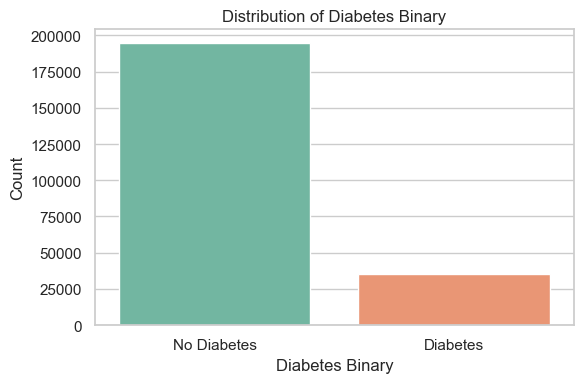

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Diabetes_binary", palette="Set2")
plt.title("Distribution of Diabetes Binary")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel("Count")
plt.xlabel("Diabetes Binary")
plt.tight_layout()
plt.show()

A majority of the individuals does not have diabetes (labeled 0), while a smaller portion of the population have diabetes or pre-diabetes (labeled 1).

## 3. Distribution of independent variables 

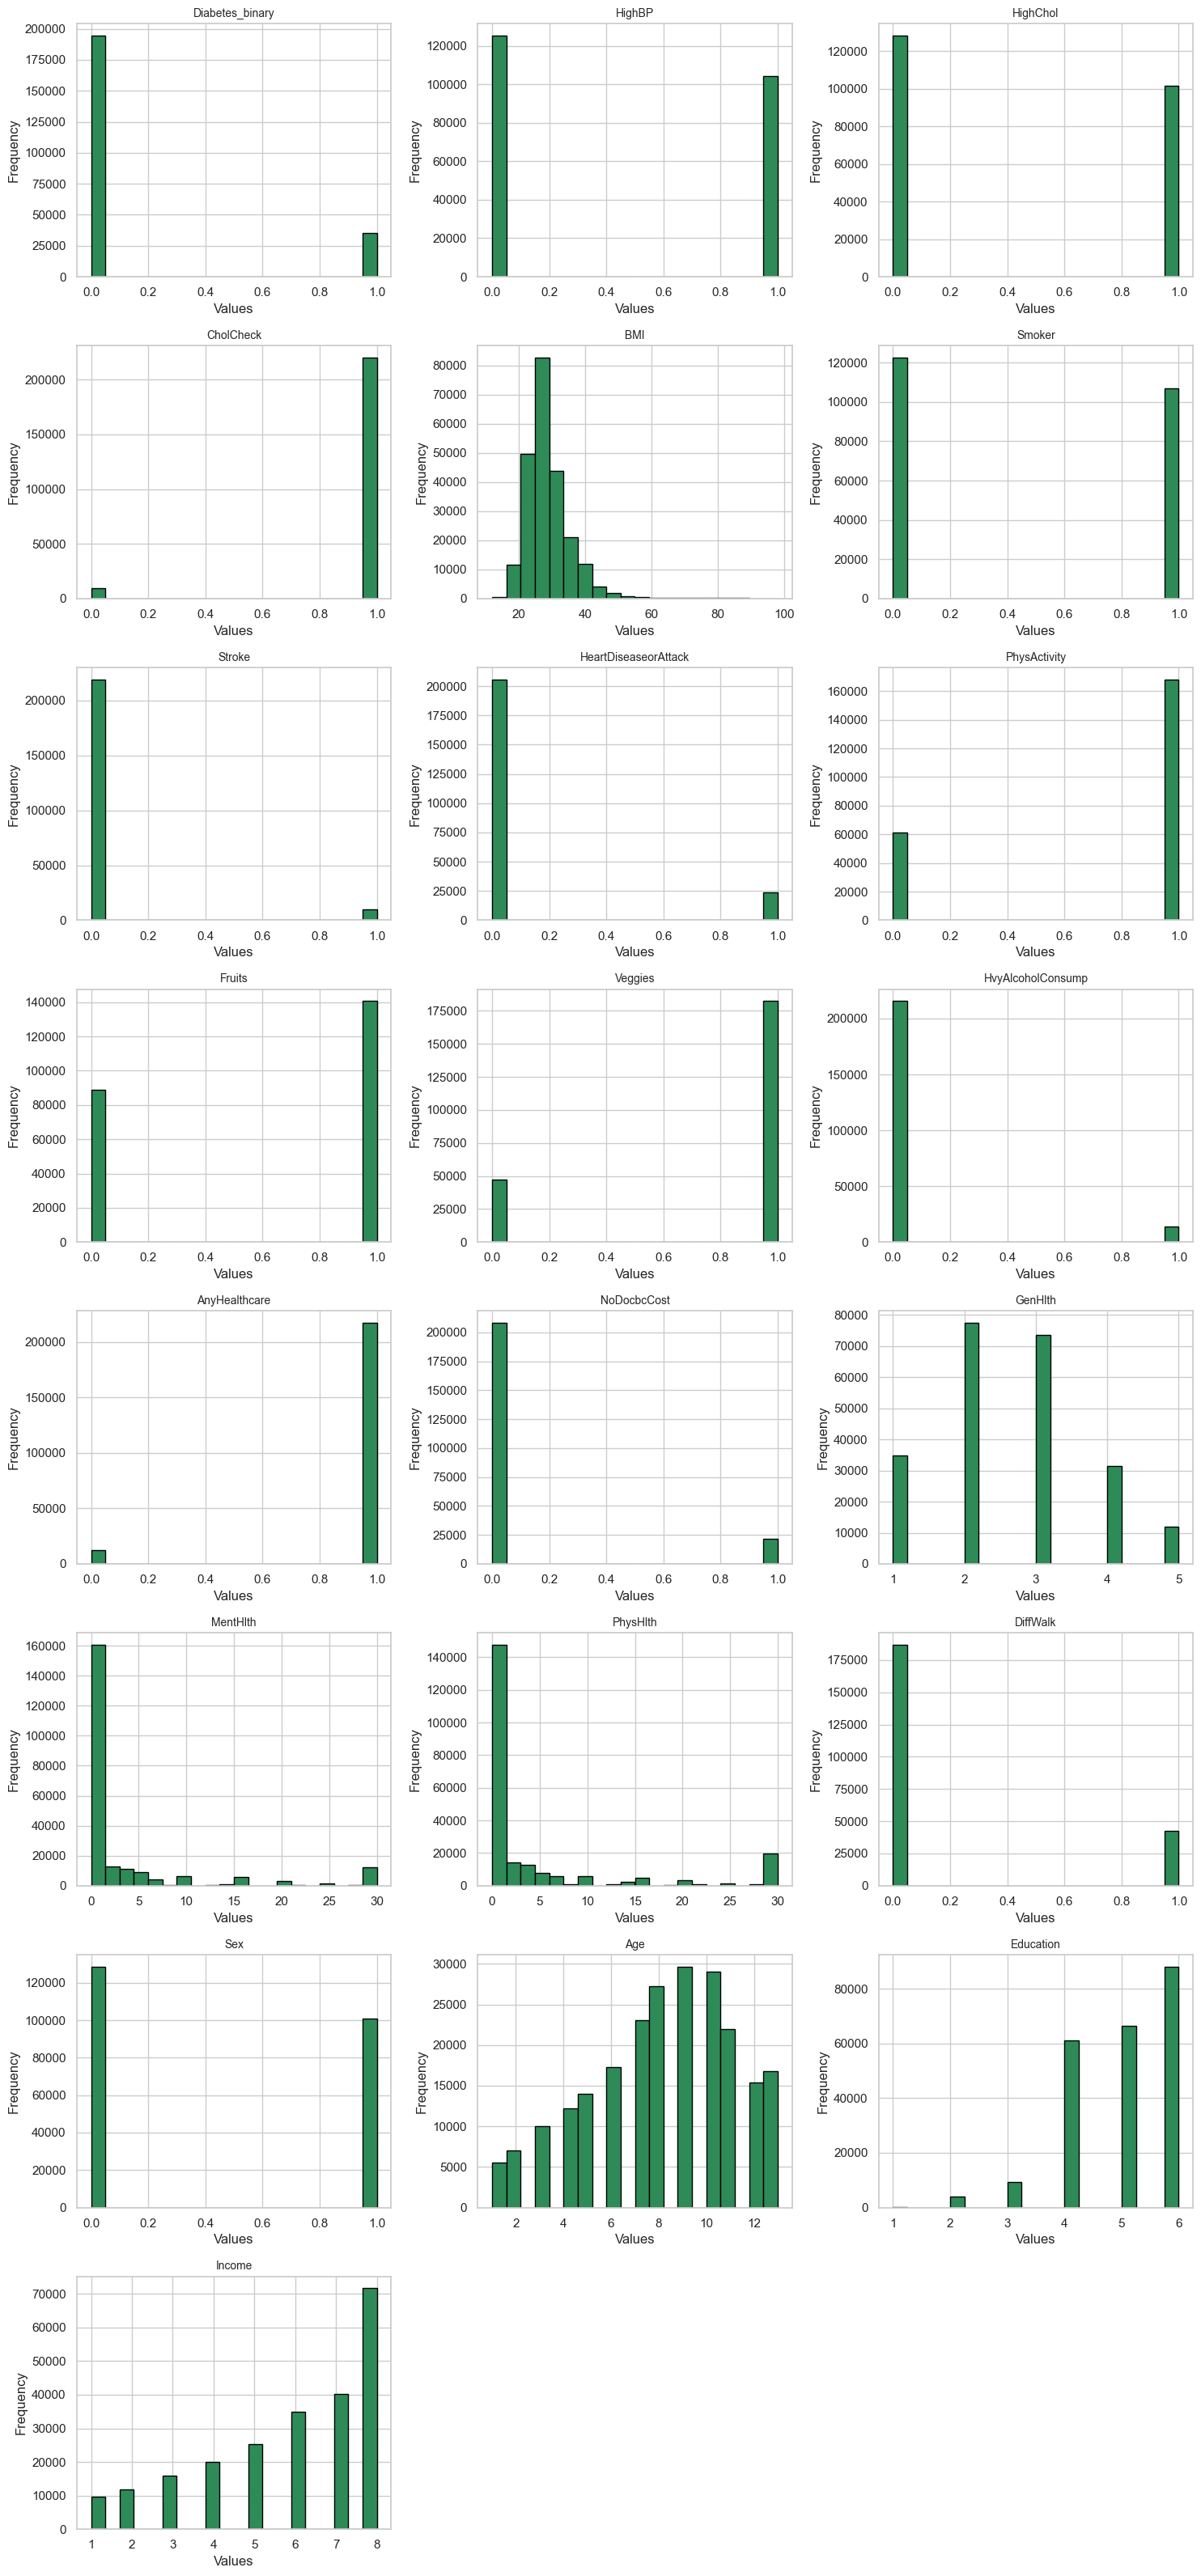

In [33]:
num_columns = len(df.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0) 
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=20, color='seagreen', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Based on the distribution in DiffWalk, GenHlth, MentHlth, most cases are relatively healthy, despite half of them are smokers and a third don't do any physical activity.
- Most cases are well Educated and have a fairly distributed income (almost).

# 4. Diabetes status distribution by Age 

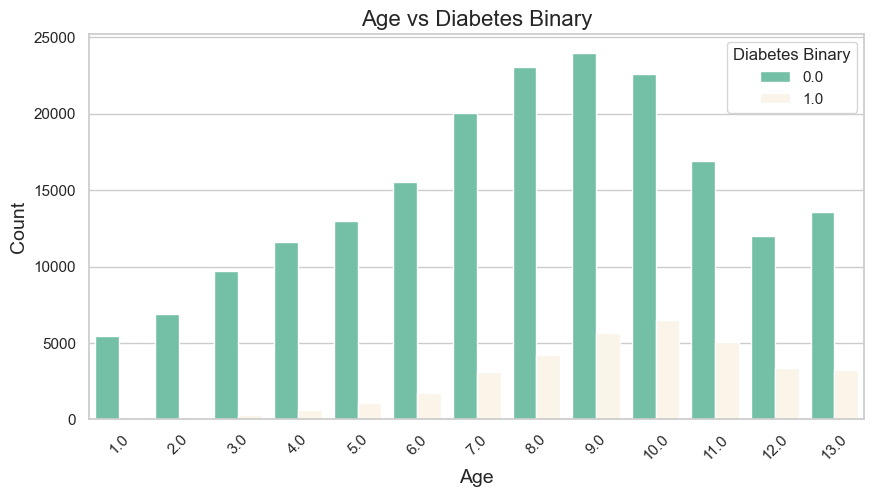

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age', hue='Diabetes_binary', data=df, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title('Age vs Diabetes Binary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

People aged 50 and above are most proned to diabetes.

## 5. Diabetes status distribution by Income and Education

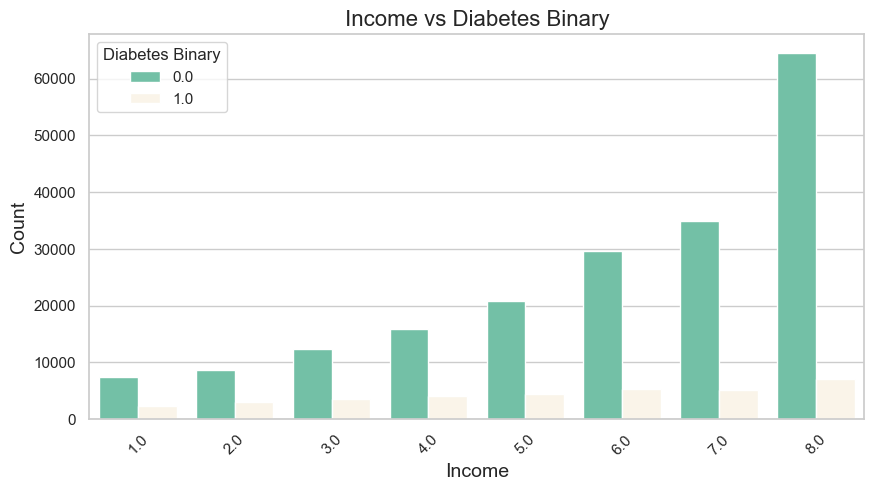

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Income', hue='Diabetes_binary', data=df, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title('Income vs Diabetes Binary', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

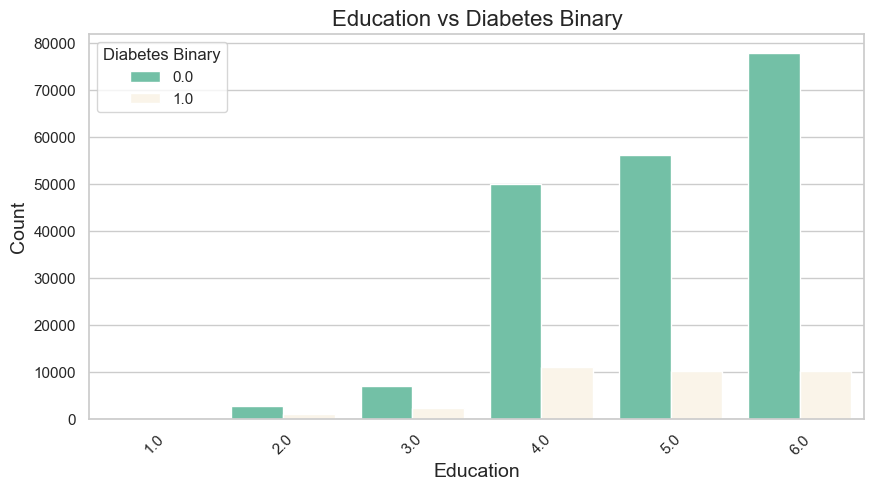

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x= "Education", hue="Diabetes_binary", data=df, palette={0: "mediumaquamarine", 1: "oldlace"})
plt.title("Education vs Diabetes Binary", fontsize=16)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Diabetes Binary')
plt.show()

The higher the Income and Education level, the better the population's health become, even though they have very little to do with being diabetic.